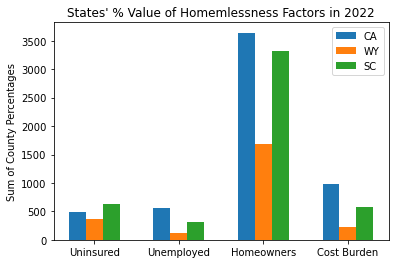

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def openAll(fileName):
    df = pd.read_csv(fileName)
    return df

def getData(fileName):
    readFile = openAll(fileName)
    return readFile

def getStateYear(readFile, year, state):
    readState = readFile.loc[lambda readFile: readFile["Year"] == year]
    readStateYear = readState.loc[lambda readState: readState["State"] == state]
    return readStateYear

def sumCells(data, column):
    returnValue = 0
    for cell in data[column]:
        returnValue += cell
    return returnValue

def percentBarGraph2022(readFile):
    stateValues = [[], [], []]
    states = ["California", "Wyoming", "South Carolina"]
    for i in range(len(stateValues)):
        state2022 = getStateYear(readFile, 2022, states[i])
        stateValues[i].append(sumCells(state2022, "Uninsured %"))
        stateValues[i].append(sumCells(state2022, "Unemployed %"))
        stateValues[i].append(sumCells(state2022, "Homeowners %"))
        stateValues[i].append(sumCells(state2022, "Severe Housing Cost Burden %"))
    xvalue = np.arange(4)
    w = 0.2
    ax = plt.subplot(111)
    axisLabels = ["Uninsured", "Unemployed", "Homeowners", "Cost Burden"]
    california = ax.bar(xvalue-0.2, stateValues[0], width = w, align='center')
    wyoming = ax.bar(xvalue, stateValues[1], width = w, align='center')
    southCarolina = ax.bar(xvalue+0.2, stateValues[2], width = w, align='center')
    plt.xticks(xvalue, axisLabels)
    ax.legend((california[0], wyoming[0], southCarolina[0]), ('CA', 'WY', 'SC'))
    plt.title("States' % Value of Homemlessness Factors in 2022")
    plt.ylabel("Sum of County Percentages")
    plt.show()

    
def interpretData():
    pd.set_option('display.max_rows', None) # Allows for all rows to be printed
    readFile = getData("Project Data.csv")
    percentBarGraph2022(readFile)
    
    
interpretData()